# **주요 내용**

*   triplet loss 실험
    *   train : test = 5 : 95로 변경



In [0]:
notebookName = "20200524_4"
notebookName

'20200524_4'

In [0]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5573752455541988348, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15677894926357367505
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1097071398991427524
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17665276850206357573
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [0]:
import platform
platform.platform()

'Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic'

In [0]:
!nvidia-smi

Mon May 25 13:45:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    34W / 250W |    353MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**unzip**

In [0]:
import os

pcm_path = "./pcm_dataset"
wav_path = "./wav_dataset"

# mkdir
if not os.path.exists(pcm_path): os.mkdir(pcm_path)
if not os.path.exists(wav_path): os.mkdir(wav_path)

# unsip
!unzip -q "/content/drive/My Drive/ETRI/9_voice_download_4_Korean_English_by_Korean_part2.zip" -d "./pcm_dataset"

print(os.listdir(pcm_path)[:5])
print(len(os.listdir(pcm_path)))

['GSF08333KJH0', 'GSM07355MIW0', 'I4F03423KSR0', 'GSM03224CHD0', 'GSF05134JHK0']
50


***.pcm to *.wav**

In [0]:
import wave

for i, folder_path in enumerate(sorted(os.listdir(pcm_path))):
    print("{}\t{}".format(i, folder_path))

    file_list = os.listdir(os.path.join(pcm_path, folder_path)) # label's path
    file_list_pcm = [files for files in file_list if files.endswith(".pcm")] # *.pcm files

    for j, file_path in enumerate(sorted(file_list_pcm)):
        with open(os.path.join(pcm_path, folder_path, file_path), "rb") as pcm_file:
            pcm_data = pcm_file.read()
        # save as {label}_{features}.wav format
        with wave.open(os.path.join(wav_path, "{}_{}.wav".format(i, j)), 'wb') as wav_file:
            wav_file.setparams((1, 2, 16000, 0, 'NONE', 'NONE')) # 16kHz, mono channel
            wav_file.writeframes(pcm_data)

0	GSF03031LJH0
1	GSF03732JJH0
2	GSF04122LHK0
3	GSF04524CJI0
4	GSF04623LWJ0
5	GSF04923PEY0
6	GSF05134JHK0
7	GSF05432KSY0
8	GSF05733HBH0
9	GSF05844LJR0
10	GSF06654KES0
11	GSF06742CKA0
12	GSF06833JYK0
13	GSF06934SYN0
14	GSF07132LCY0
15	GSF08142LDH0
16	GSF08233NEH0
17	GSF08333KJH0
18	GSF09025WYY0
19	GSF09431SHY0
20	GSF09844KKS0
21	GSM02434AGS0
22	GSM02544LHS0
23	GSM03224CHD0
24	GSM03321SDK0
25	GSM03634SJY0
26	GSM03823YJK0
27	GSM04233KMS0
28	GSM04424JBRC
29	GSM05953CJH0
30	GSM06044JBY0
31	GSM06235BJH0
32	GSM07042NSK0
33	GSM07355MIW0
34	GSM09534JHD0
35	GSM09644KCK0
36	GSM09752SCY0
37	I4F02224SDY0
38	I4F02631KSM0
39	I4F02821YRR0
40	I4F02933JSI0
41	I4F03423KSR0
42	I4F03543KSY0
43	I4F03922LKY0
44	I4F04732OIY0
45	I4F05332CJH0
46	I4F05625JSY0
47	I4F07443LJA0
48	I4F07633JSI0
49	I4F07852PKJ0


In [0]:
import numpy as np

num_labels = 50
num_features = 100
data_length = 3 ** 9

train_rate = 0.8
num_train_data = int(num_features * train_rate) # 80
shot = 1

# select_train_data = [True] * num_train_data + [False] * (num_features - num_train_data)
# select_test_data = [False] * num_train_data + [True] * (num_features - num_train_data)

a = np.array([True] * (shot + 1) + [False] * (num_train_data - shot - 1))
np.random.shuffle(a)
b = np.array([False] * (num_features - num_train_data))

select_train_data = np.concatenate((a, b))
select_test_data = [False] * num_train_data + [True] * (num_features - num_train_data)

**train data, test data로 구분하여 numpy 저장 (*.npz)**

In [12]:
from scipy.io import wavfile

data = np.zeros((num_labels * num_features, data_length))
labels = np.zeros((num_labels * num_features))

for i in range(num_labels):
    for j in range(num_features):
        file_name = "{}_{}.wav".format(i, j)
        sample_rate, samples = wavfile.read(os.path.join(wav_path, file_name))
        
        start = int(len(samples) - data_length) // 2
        end = start + data_length
        
        data[i * num_features + j] = samples[start:end]
        labels[i * num_features + j] = i

train_data = data[list(select_train_data) * num_labels]
train_labels = labels[list(select_train_data) * num_labels]

test_data = data[select_test_data * num_labels]
test_labels = labels[select_test_data * num_labels]

# save *.npy        
np.save("./train_data", train_data)
np.save("./train_labels", train_labels)

np.save("./test_data", test_data)
np.save("./test_labels", test_labels)

print("train_data.shape: {}, train_labels.shape: {}".format(train_data.shape, train_labels.shape))
print("test_data.shape: {}, test_labels.shape: {}".format(test_data.shape, test_labels.shape))

train_data.shape: (100, 19683), train_labels.shape: (100,)
test_data.shape: (1000, 19683), test_labels.shape: (1000,)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data[:, :, np.newaxis], train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data[:, :, np.newaxis], test_labels))

train_dataset = train_dataset.shuffle(3**9 * 1000).batch(128)
test_dataset = test_dataset.batch(128)

In [14]:
train_dataset

<BatchDataset shapes: ((None, 19683, 1), (None,)), types: (tf.float64, tf.float64)>

**Build Model**

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (data_length, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size = 3),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size = 3),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv1D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size = 3),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv1D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size = 3),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, activation = None),
    tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis = 1)) # L2 normalize embeddings
]) 

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 19683, 32)         128       
_________________________________________________________________
batch_normalization_4 (Batch (None, 19683, 32)         128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 6561, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6561, 32)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6561, 64)          6208      
_________________________________________________________________
batch_normalization_5 (Batch (None, 6561, 64)          256       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 2187, 64)         

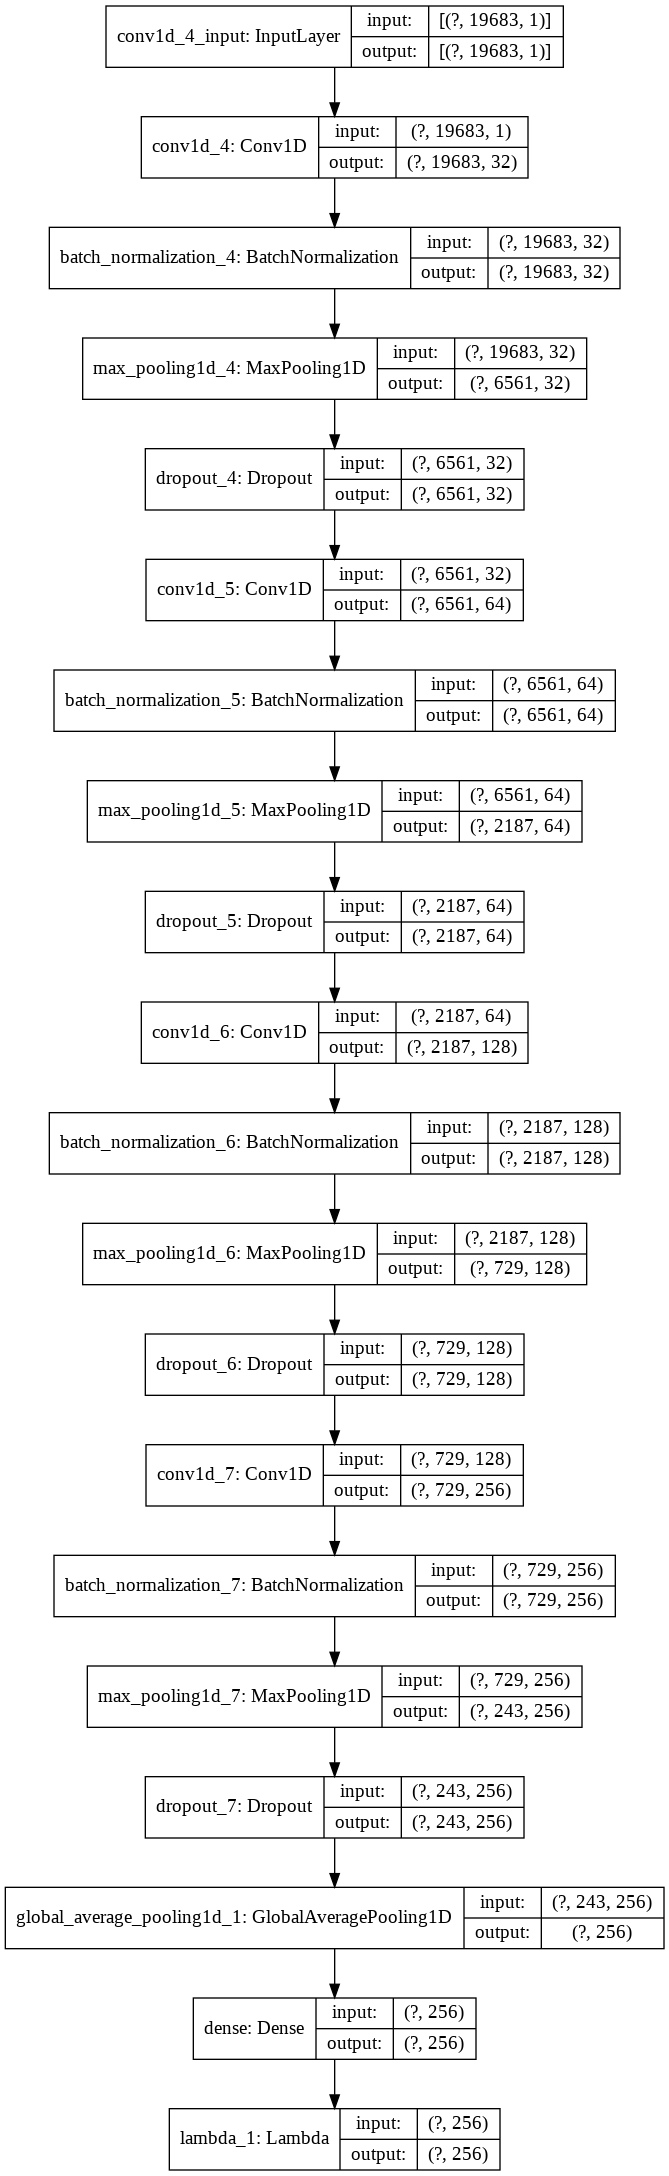

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True, to_file = 'model.png')

**Train model**

In [0]:
import tensorflow_addons as tfa
import tensorflow_datasets as tfds

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss = tfa.losses.TripletSemiHardLoss())

In [31]:
# Train the network
history = model.fit(
    train_dataset,
    verbose = 1,
    epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9938
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9933
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9912
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9902
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9864
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9799
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9753
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9645
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9588
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9413
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9352
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9356
Epoch 13/100
1/1 [==============================] - 0s 1ms/st

In [0]:
results = model.predict(test_dataset)

In [33]:
results.shape

(1000, 256)

In [0]:
import io
import numpy as np

# Save test embeddings for visualization in projector
np.savetxt("vecs.tsv", results, delimiter='\t')

out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for img, labels in tfds.as_numpy(test_dataset):
    [out_m.write(str(x) + "\n") for x in labels]
out_m.close()


try:
  from google.colab import files
  files.download('vecs.tsv')
  files.download('meta.tsv')
except:
  pass

In [35]:
history.history.keys()

dict_keys(['loss'])

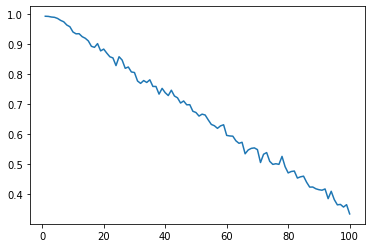

In [36]:
from matplotlib import pyplot as plt
plt.plot(np.arange(1, epoch + 1, 1), history.history['loss'])